In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style


In [3]:
df=pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
df.shape

(10000, 6)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [9]:
df.isnull().sum().sum()

np.int64(0)

unique values for categorical variables


In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

EXTRACURRICULAR ACTIVITIES :  2
Extracurricular Activities
Yes    4948
No     5052
Name: count, dtype: int64




In [12]:
df['Extracurricular Activities']= df['Extracurricular Activities'].map({'No':0,'Yes':1})

Converting categorical to dummy variables


In [14]:
df['Extracurricular Activities'] = (
    df['Extracurricular Activities']
      .map({'Yes':1, 'No':0})
      .fillna(0)
      .astype(int)
)


In [15]:
df['Extracurricular Activities']= df['Extracurricular Activities'].astype(int)
df['Extracurricular Activities']

,Extracurricular Activities
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [16]:
df.shape

(10000, 6)

In [19]:
df.duplicated().sum()


np.int64(234)

In [20]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (10000, 6)
After (9766, 6)


In [21]:
df.duplicated().sum()

np.int64(0)

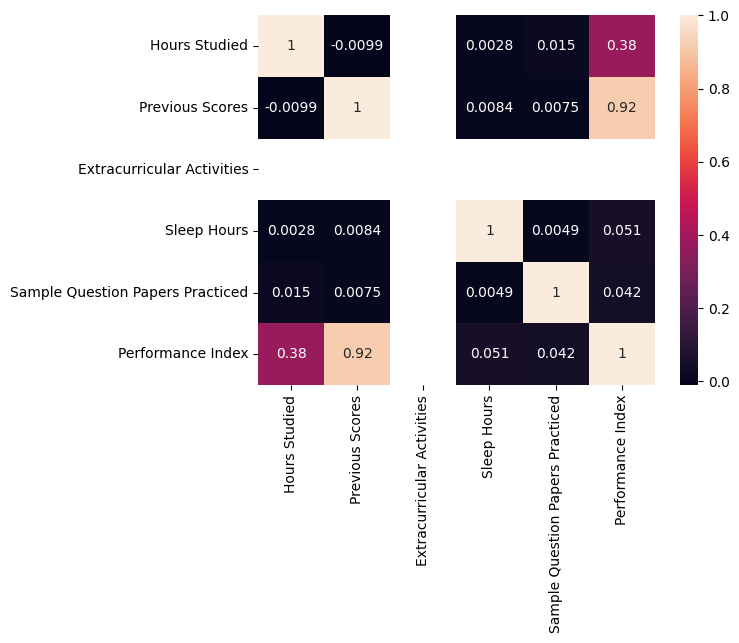

In [22]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

linear regression train test

In [23]:
X = df[['Hours Studied']]
y = df['Performance Index']


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)
regression_model= LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [28]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


The coefficient for Hours Studied is 2.762654704896502


In [30]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))


The intercept for our model is 41.51240751922512


In [31]:
regression_model.score(X_train, y_train)

0.13887549551060985

In [32]:
regression_model.score(X_test, y_test)


0.14669717473711907

In [36]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [37]:
model = sm.OLS(y_train,X_train).fit()
model

In [39]:
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

np.sqrt(mse)

np.float64(17.74569783732026)

In [41]:
y_pred = model.predict(X_test)


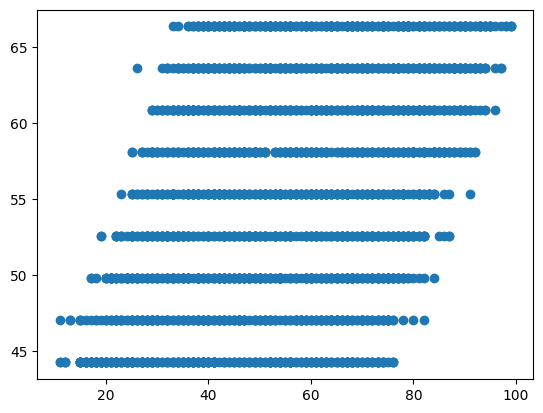

In [42]:
plt.scatter(y_test, y_pred)
plt.show()

In [43]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(41.51) * const + (2.76) * Hours Studied + 